# Example: Calculating Vertical Intensities

This file demonstrates how to use MUTE to calculate true vertical and vertical equivalent intensities for the DDM and SIBYLL-2.3d hadronic interaction models.

## Import Packages

In [1]:
import mute.constants as mtc
import mute.underground as mtu

import matplotlib.pyplot as plt
import numpy as np

## Set the Constants

In [2]:
mtc.set_verbose(2)
mtc.set_output(True)
mtc.set_directory("mute/data")
mtc.set_lab("Default")
mtc.set_overburden("flat")
mtc.set_vertical_depth(1)
mtc.set_medium("rock")
mtc.set_density(2.65)
mtc.set_n_muon(1000)

## Calculate the Intensities

True vertical underground intensities are calculated with the ``mtu.calc_u_intensities_tr()`` function, and vertical-equivalent underground intensities can be calculated with the ``mtu.calc_u_intensities_eq()`` function. Both will return arrays with the intensities for the given slant depths and angles. The hadronic interaction model can be specified with the ``interaction_model`` parameter, and ``output`` can be set to ``False`` so output files containing the intensities are not written.

In [3]:
# True vertical underground intensities

intensities_DDM = mtu.calc_u_intensities_tr(interaction_model = "DDM", output = False)
intensities_SIB = mtu.calc_u_intensities_tr(interaction_model = "SIBYLL-2.3d", output = False)

# Vertical-equivalent underground intensities

intensities_EQ = mtu.calc_u_intensities_eq(output = False)

Calculating underground fluxes.
Loading surface fluxes for USStd using DDM and GSF.
Loaded surface fluxes.
Loading survival probabilities from mute/data/survival_probabilities/Default_rock_1000_Survival_Probabilities.txt.
Loaded survival probabilities.
Finished calculating underground fluxes.
Calculating true vertical underground intensities.
Finished calculating true vertical underground intensities.
Calculating underground fluxes.
Loading surface fluxes for USStd using SIBYLL-2.3d and GSF.
Loaded surface fluxes.
Loading survival probabilities from mute/data/survival_probabilities/Default_rock_1000_Survival_Probabilities.txt.
Loaded survival probabilities.
Finished calculating underground fluxes.
Calculating true vertical underground intensities.
Finished calculating true vertical underground intensities.
Calculating underground fluxes.
Loading surface fluxes for USStd using SIBYLL-2.3c and GSF.
Loaded surface fluxes.
Loading survival probabilities from mute/data/survival_probabilitie

## Plot the Results

Because depths and angles were not specified in the functions above, the intensities were calculated for the default 23 slant depths and angles stored in ``mtc.slant_depths`` and ``mtc.angles``. Plotting intensity against slant depth can show the deviation of the vertical-equivalent intensity from the true vertical intensity.

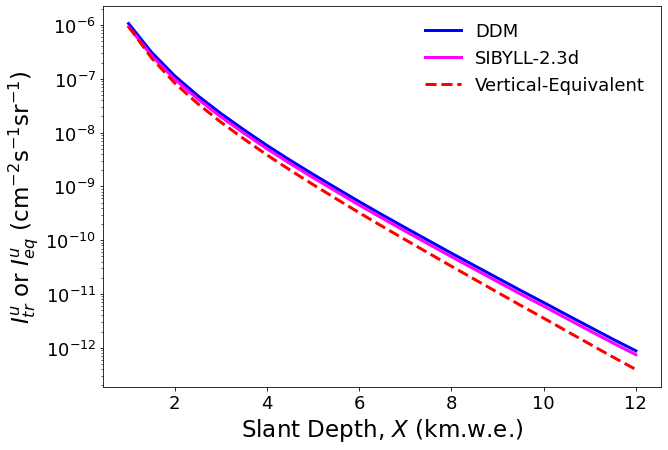

In [4]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111)

ax.plot(mtc.slant_depths, intensities_DDM, color = "blue", lw = 3, ls = "-", label = "DDM")
ax.plot(mtc.slant_depths, intensities_SIB, color = "magenta", lw = 3, ls = "-", label = "SIBYLL-2.3d")
ax.plot(mtc.slant_depths, intensities_EQ, color = "red", lw = 3, ls = "--", label = "Vertical-Equivalent")

ax.set_xlabel("Slant Depth, $X$ (km.w.e.)", fontsize = 23)
ax.set_ylabel(r"$I^u_{tr}$ or $I^u_{eq}$ (cm$^{-2}$s$^{-1}$sr$^{-1}$)", fontsize = 23)
ax.tick_params(axis = "both", which = "major", labelsize = 18)
ax.set_yscale("log")

plt.legend(frameon = False, fontsize = 18)

plt.show()